In [603]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Statistical Analysis on factors influencing Life Expectancy

In [604]:
df = pd.read_csv('LifeExpectancyData.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [605]:
df.shape

(2938, 22)

### Brief description
1. **Country**
2. **Year**
3. **Status**: Developed or Developing status
4. **Life expectancy**: Life Expectancy in age
5. **Adult Mortality**: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
6. **infant deaths**: Number of Infant Deaths per 1000 population
7. **Alcohol**: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
8. **percentage expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
9. **Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
10. **Measles**: Measles - number of reported cases per 1000 population
11. **BMI**: Average Body Mass Index of entire population
12. **under-five deaths**: Number of under-five deaths per 1000 population
13. **Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%)
14. **Total expenditure**: General government expenditure on health as a percentage of total government expenditure (%)
15. **Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
16. **HIV/AIDS**: Deaths per 1 000 live births HIV/AIDS (0-4 years)
17. **GDP**: Gross Domestic Product per capita (in USD)
18. **Population**: Population of the country
19. **thinness 1-19 years**: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
20. **thinness 5-9 years**: Prevalence of thinness among children for Age 5 to 9(%)
21. **Income composition of resources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
22. **Schooling**: Number of years of Schooling(years)

In [606]:
#Some columns contain spaces, which is inconvinient. Delete of replace it with _
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

### Verify descriptive statistics

In [607]:
df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Identify percentage of null values in each column.

In [608]:
df.isnull().sum()*100/df.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

In [609]:
country_list = df.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI',
             'Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

In [610]:
for country in country_list:
    df.loc[df['Country'] == country, fill_list] = df.loc[df['Country'] == country, fill_list].interpolate()
    
# Drop remaining null values after interpolation.
df.dropna(inplace=True)

In [611]:
df.isna().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

In [612]:
df.head().T

,0,1,2,3,4
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Year,2015,2014,2013,2012,2011
Status,Developing,Developing,Developing,Developing,Developing
Life_Expectancy,65,59.9,59.9,59.5,59.2
Adult_Mortality,263,271,268,272,275
Infant_Deaths,62,64,66,69,71
Alcohol,0.01,0.01,0.01,0.01,0.01
Percentage_Exp,71.2796,73.5236,73.2192,78.1842,7.09711
HepatitisB,65,62,64,67,68
Measles,1154,492,430,2787,3013


### EDA and Feature Selection

#### What is the distribution of Life Expectancy by Country?

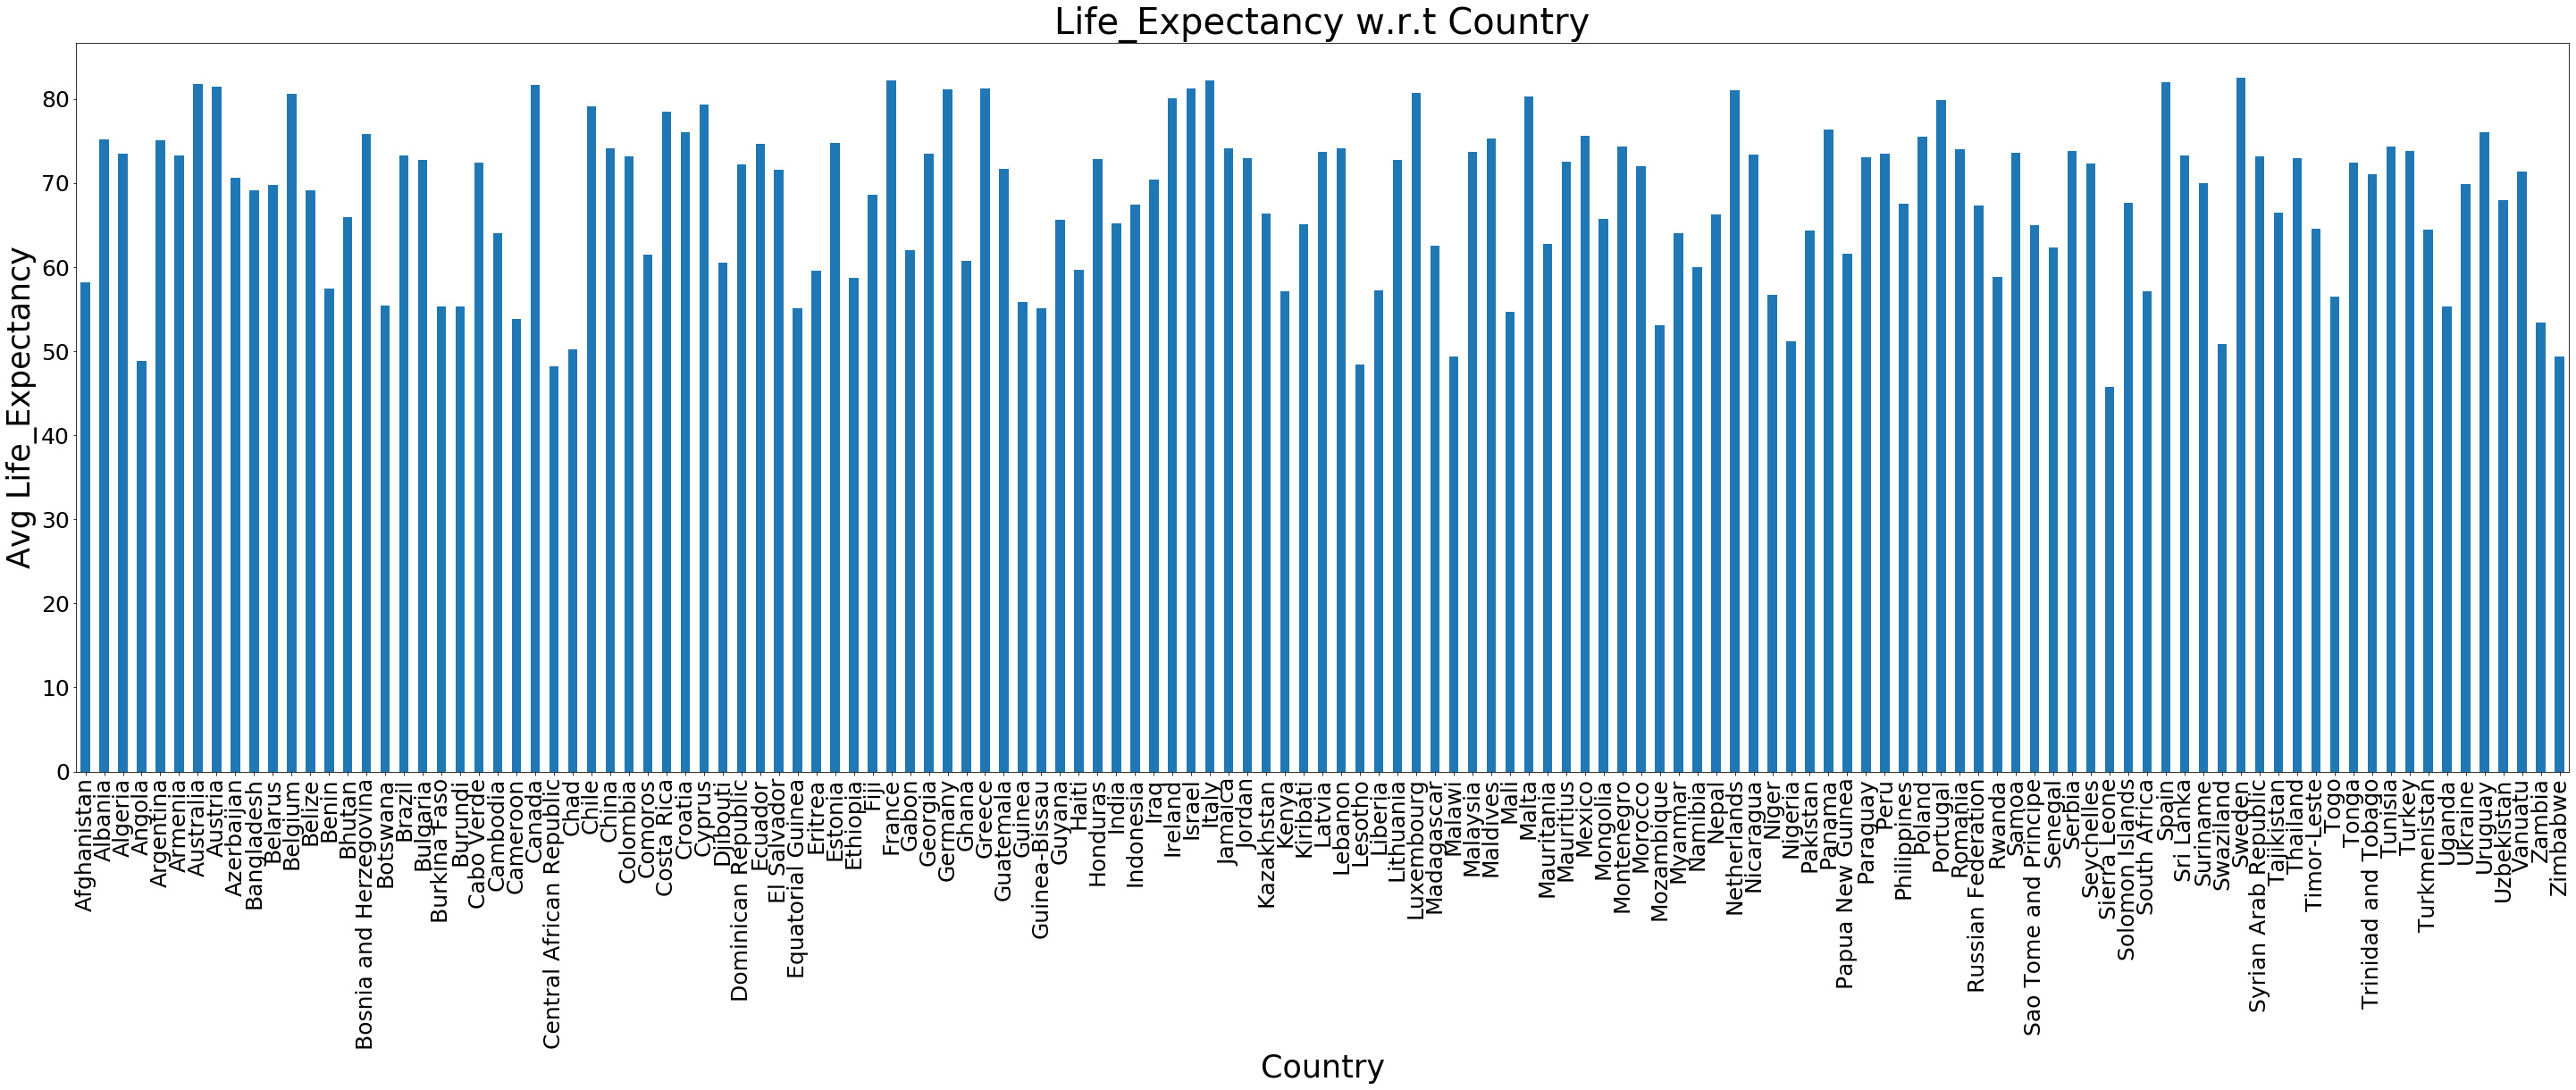

In [613]:
le_country = df.groupby('Country')['Life_Expectancy'].mean()
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

#### Does Country Status affect the Life Expectancy?

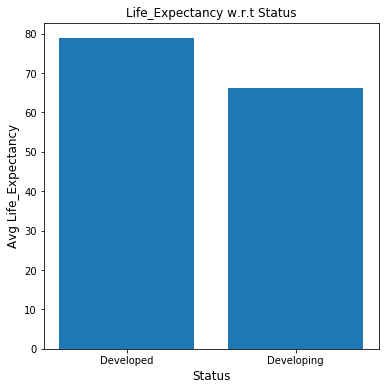

In [614]:
plt.figure(figsize=(6,6))
plt.bar(df.groupby('Status')['Status'].count().index,df.groupby('Status')['Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

#### From the above, developed countries have higher average Life_Expectancy compared to Developing. 
Let us find out statistically if this difference is significant. 

#### Finding the significance of difference of Life Expectancy between Developed and Developing countries using t-test

In [615]:
import scipy.stats as stats
stats.ttest_ind(df.loc[df['Status']=='Developed','Life_Expectancy'], df.loc[df['Status']=='Developing','Life_Expectancy'])

Ttest_indResult(statistic=22.92439377113489, pvalue=2.2504696584331004e-103)

#### P-value is < 0.05. Hence, the difference of Life Expectancy between Developed and Developing countries is significant. 
### We can consider 'Status' as a feature as it is related to Life Expectancy!

#### Now let's encode categorical features to build a linear model

In [616]:
from sklearn.preprocessing import LabelEncoder 

In [617]:
#Label encoding for county
le = LabelEncoder()
le.fit(df['Country'])
df['Country'] = le.transform(df['Country'])

In [618]:
#One hot encoding for Status
df_full = pd.get_dummies(df)

### We have several useful features in the dataset, but do they all really influencing life expactancy?
Regression analysis can help finding the insignificant features

In [619]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

times_with_one = sm.add_constant(df_full.drop(['Life_Expectancy'], axis=1))
results = sm.OLS(df['Life_Expectancy'], times_with_one).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     475.5
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:31:13   Log-Likelihood:                -5541.4
No. Observations:                1987   AIC:                         1.113e+04
Df Residuals:                    1965   BIC:                         1.125e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Looking at the p-values we have to remove:
1. **thinness_1to19_years**
2. **thinness_1to19_years**
3. **Country**
4. **HepatitisB**
5. **Population**
6. **GDP**

from our list and it’s **not** a significant variable. 

### To understand if these assumptions are right we can build a linear model with all features, and the model without insignificant factors 

#### I will use several regression models with different regularization types and compare them on MSE and R^2 mectrics

In [620]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Baseline models

In [621]:
X = df_full.drop('Life_Expectancy', axis = 1)
y = df_full['Life_Expectancy']

In [622]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [623]:
lr = LinearRegression()
lr_elastic = ElasticNet(max_iter=10000)
lr_lasso = Lasso(max_iter=10000)

In [624]:
lr.fit(X_train, y_train)
lr_elastic.fit(X_train, y_train)
lr_lasso.fit(X_train, y_train)

Lasso(max_iter=10000)

In [625]:
y_test_pred = lr.predict(X_test)
y_test_pred_elastic = lr_elastic.predict(X_test)
y_test_pred_lasso = lr_lasso.predict(X_test)

In [626]:
print('Model:\tLinearRegression \tElasticNet \t\tLasso')
print('MSE:\t{}\t{}\t{}'.format(mean_squared_error(y_test_pred, y_test),
                               mean_squared_error(y_test_pred_elastic, y_test),
                               mean_squared_error(y_test_pred_lasso, y_test)
                              ))
print('R2:\t{}\t{}\t{}'.format(r2_score(y_test_pred, y_test),
                      r2_score(y_test_pred_elastic, y_test),
                      r2_score(y_test_pred_lasso, y_test)
                     ))

Model:	LinearRegression 	ElasticNet 		Lasso
MSE:	14.96894341531582	15.97378071619871	16.05902175123507
R2:	0.809956384132909	0.779631947855929	0.7768329961911624


In [627]:
print('Slope: {}'.format(reg.coef_))
print('Intercept: {:.2f}'.format(reg.intercept_))

Slope: [-8.13165112e-02 -1.40553097e-02  8.36891993e-02 -1.55290401e-01
  4.13683030e-04 -6.28544635e-06  5.44115202e-02 -6.26270191e-02
  1.13985160e-02  9.38753602e-02  1.98023548e-02 -4.75980339e-01
 -2.93218899e-02  9.88664428e+00  8.61999690e-01  4.88416954e-01
 -4.88416954e-01]
Intercept: 214.74


### Model with features selected statistically

In [628]:
X = df_full.drop(['Life_Expectancy', 
    'thinness_1to19_years',
    'thinness_1to19_years',
    'Country',
    'HepatitisB',
    'Population',
    'GDP'], axis = 1)
y = df_full['Life_Expectancy']

In [629]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [630]:
lr = LinearRegression()
lr_elastic = ElasticNet(max_iter=10000)
lr_lasso = Lasso(max_iter=10000)

In [631]:
lr.fit(X_train, y_train)
lr_elastic.fit(X_train, y_train)
lr_lasso.fit(X_train, y_train)

Lasso(max_iter=10000)

In [632]:
y_test_pred = lr.predict(X_test)
y_test_pred_elastic = lr_elastic.predict(X_test)
y_test_pred_lasso = lr_lasso.predict(X_test)

In [633]:
print('Model:\tLinearRegression \tElasticNet \t\tLasso')
print('MSE:\t{}\t{}\t{}'.format(mean_squared_error(y_test_pred, y_test),
                               mean_squared_error(y_test_pred_elastic, y_test),
                               mean_squared_error(y_test_pred_lasso, y_test)
                              ))
print('R2:\t{}\t{}\t{}'.format(r2_score(y_test_pred, y_test),
                      r2_score(y_test_pred_elastic, y_test),
                      r2_score(y_test_pred_lasso, y_test)
                     ))

Model:	LinearRegression 	ElasticNet 		Lasso
MSE:	14.888606410072168	15.900081210894541	15.975934971081632
R2:	0.8107975239926243	0.7804275753238106	0.777980026572489


In [634]:
y_test_pred = reg.predict(X_test)

In [635]:
print('MSE: {}'.format(mean_squared_error(y_test_pred, y_test)))
print('R2: {}'.format(r2_score(y_test_pred, y_test)))

MSE: 14.888606410072168
R2: 0.8107975239926243


In [636]:
print('Slope: {}'.format(reg.coef_))
print('Intercept: {:.2f}'.format(reg.intercept_))

Slope: [-8.13165112e-02 -1.40553097e-02  8.36891993e-02 -1.55290401e-01
  4.13683030e-04 -6.28544635e-06  5.44115202e-02 -6.26270191e-02
  1.13985160e-02  9.38753602e-02  1.98023548e-02 -4.75980339e-01
 -2.93218899e-02  9.88664428e+00  8.61999690e-01  4.88416954e-01
 -4.88416954e-01]
Intercept: 214.74


    
    Results

    As we can see there is an improvement in MSE anr R^2 metrics as we delete the insignificant features and this remains true for different model types. That means that not every factor is actually affecting the life expectancy. Based on Linear Regression model coeficients and statistical test we found more relevant set of features to work with